In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r data
%store -r target

In [3]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (8091, 51)
X_test shape: (999, 51)
X_val shape: (900, 51)
y_train shape: (8091,)
y_test shape: (999,)
y_val shape: (900,)


### Original Model
Building a model with no parameter tuning and using the raw csv file

In [4]:
model_svm = SVC()
model_svm.fit(X_dev, y_dev)
predsDevsvm = model_svm.predict(X_dev)
predsTestsvm = model_svm.predict(X_test)

In [5]:
testsvm_score =  accuracy_score(y_test, predsTestsvm)
devsvm_score = accuracy_score(y_dev, predsDevsvm)

In [6]:
print("Classification Score for SVM Classifier on Dev dataset:\n")
print("Dev Score : ", devsvm_score)
print(classification_report(y_dev, predsDevsvm))
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", testsvm_score)
print(classification_report(y_test, predsTestsvm))

Classification Score for SVM Classifier on Dev dataset:

Dev Score :  0.7821154487821155
              precision    recall  f1-score   support

       blues       0.74      0.83      0.78       904
   classical       0.89      0.96      0.92       894
     country       0.75      0.70      0.72       886
       disco       0.70      0.71      0.71       890
      hiphop       0.80      0.70      0.75       901
        jazz       0.83      0.86      0.84       886
       metal       0.85      0.89      0.87       923
         pop       0.87      0.84      0.85       896
      reggae       0.74      0.72      0.73       904
        rock       0.65      0.62      0.64       907

    accuracy                           0.78      8991
   macro avg       0.78      0.78      0.78      8991
weighted avg       0.78      0.78      0.78      8991

--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.7627627627627628
     

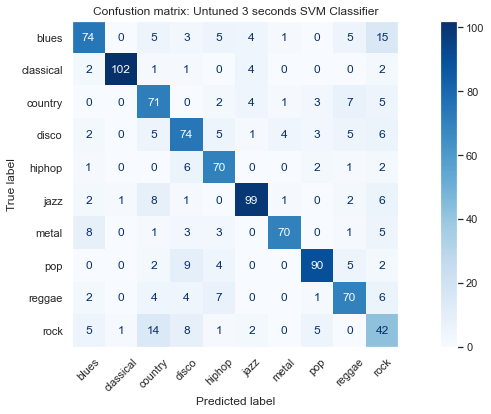

Accuracy : 0.76
Macro F-1 Score : 0.76


In [7]:
# Evaluate Model on Test set
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(predsTestsvm, y_test, class_labels,
                                    'Confustion matrix: Untuned 3 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the raw csv file

In [8]:
parameters = {"kernel": ['linear', 'rbf'],
            'C': np.linspace(1, 100, num=2),
            "gamma": np.linspace(0.0001,1, num=2)}
print(parameters)

{'kernel': ['linear', 'rbf'], 'C': array([  1., 100.]), 'gamma': array([1.e-04, 1.e+00])}


In [9]:
tune_svm = GridSearchCV(estimator = model_svm, param_grid = parameters, cv = 5)
tune_svm.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([  1., 100.]),
                         'gamma': array([1.e-04, 1.e+00]),
                         'kernel': ['linear', 'rbf']})

In [10]:
print("Best Score :", tune_svm.best_score_)
print("Best Parameters :",tune_svm.best_params_)

Best Score : 0.9095773761346837
Best Parameters : {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [11]:
predsDevsvm_tuned = tune_svm.predict(X_dev)
predsTestsvm_tuned = tune_svm.predict(X_test)

print("Score on Dev data for svm using GridSearchCV:", accuracy_score(y_dev, predsDevsvm_tuned))
print("Score on Test data for svm using GridSearchCV:",accuracy_score(y_test, predsTestsvm_tuned))

Score on Dev data for svm using GridSearchCV: 0.9991102213324435
Score on Test data for svm using GridSearchCV: 0.9019019019019019


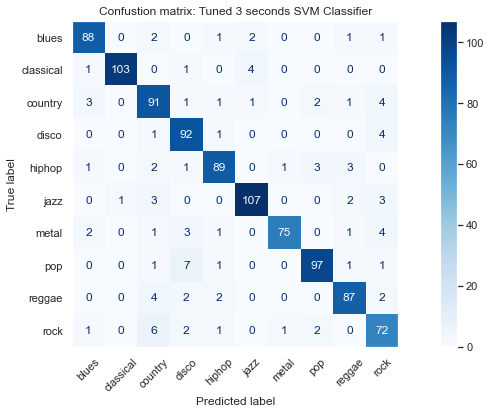

Accuracy : 0.90
Macro F-1 Score : 0.90


In [12]:
# Evaluate Model on Test set
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(predsTestsvm_tuned, y_test, class_labels,
                                    'Confustion matrix: Tuned 3 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Dimensionality reduction of data using PCA

In [13]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.11454404 0.08920634 0.04504717 0.02937379 0.02274578 0.0199205
 0.01584086 0.01368273 0.01132293 0.01090893 0.00892619 0.00814798
 0.00722979 0.006841   0.00622568 0.00604714 0.00535485 0.00529876
 0.00508264 0.00483057 0.00471978 0.00416831 0.00364091 0.00346842
 0.00329331 0.00306033 0.00283514 0.00280637 0.00272849 0.00268529]
Sum of Explained Variance: 0.9367919789435962


In [14]:
pca_final.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-0.262197,-0.041290,-0.004825,0.077376,-0.092646,-0.202192,0.134131,-0.029631,0.065922,0.012867,...,-0.034949,0.005732,-0.061761,-0.055369,-0.026100,-0.001593,0.010302,0.002418,-0.029570,blues
1,0.911816,0.656705,0.093061,0.041841,0.162398,-0.345905,-0.111046,0.005599,0.107215,0.058366,...,0.019054,-0.111605,0.038532,0.041467,0.033188,-0.059509,0.061410,0.111786,-0.028550,pop
2,-0.346865,0.190015,-0.015068,-0.042262,0.002092,-0.081458,-0.064500,-0.077144,-0.020674,-0.082201,...,-0.023486,0.040473,0.009675,-0.002425,0.055471,-0.028687,-0.023928,-0.005007,-0.039387,rock
3,0.165602,-0.054123,-0.230414,-0.096289,0.254820,0.184293,-0.224996,0.077982,-0.083897,-0.040343,...,0.058428,0.026190,0.055005,0.001305,-0.016309,-0.003033,-0.130903,-0.023350,-0.073244,jazz
4,-0.213596,0.153496,0.162250,0.171556,0.164251,-0.038910,0.033228,0.036497,0.089944,0.132926,...,0.094002,0.053866,0.074851,-0.046638,-0.000640,-0.059718,-0.019850,-0.003886,-0.045338,hiphop


### PCA - Original Model
Building a model with no parameter tuning and using the PCA data

In [15]:
model_pca = SVC()
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainsvm = model_pca.predict(pca_data)
pcaTestsvm = model_pca.predict(pca_data_test)

In [16]:
pcatestsvm_score =  accuracy_score(y_test, pcaTestsvm)
pcasvm_score = accuracy_score(y_dev, pcaTrainsvm)

In [17]:
print("Classification Score for SVM Classifier on Train dataset:\n")
print("Train Score : ", pcasvm_score)
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", pcatestsvm_score)

Classification Score for SVM Classifier on Train dataset:

Train Score :  0.9036814592370148
--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.8668668668668669


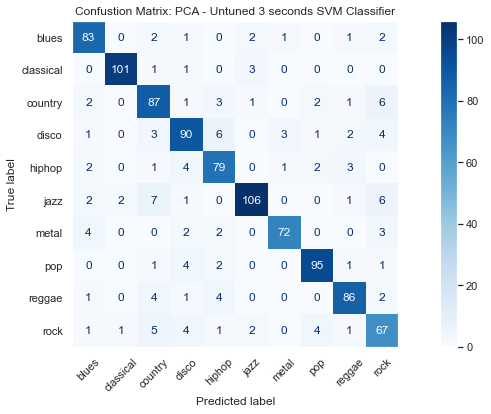

Accuracy : 0.87
Macro F-1 Score : 0.87


In [18]:
# Evaluate Model
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(pcaTestsvm, y_test, class_labels,
                                    'Confustion Matrix: PCA - Untuned 3 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### PCA - Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the PCA data

In [19]:
pca_final.iloc[:,:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.262197,-0.041290,-0.004825,0.077376,-0.092646,-0.202192,0.134131,-0.029631,0.065922,0.012867,...,-0.011059,-0.034949,0.005732,-0.061761,-0.055369,-0.026100,-0.001593,0.010302,0.002418,-0.029570
1,0.911816,0.656705,0.093061,0.041841,0.162398,-0.345905,-0.111046,0.005599,0.107215,0.058366,...,0.005904,0.019054,-0.111605,0.038532,0.041467,0.033188,-0.059509,0.061410,0.111786,-0.028550
2,-0.346865,0.190015,-0.015068,-0.042262,0.002092,-0.081458,-0.064500,-0.077144,-0.020674,-0.082201,...,-0.049137,-0.023486,0.040473,0.009675,-0.002425,0.055471,-0.028687,-0.023928,-0.005007,-0.039387
3,0.165602,-0.054123,-0.230414,-0.096289,0.254820,0.184293,-0.224996,0.077982,-0.083897,-0.040343,...,-0.023017,0.058428,0.026190,0.055005,0.001305,-0.016309,-0.003033,-0.130903,-0.023350,-0.073244
4,-0.213596,0.153496,0.162250,0.171556,0.164251,-0.038910,0.033228,0.036497,0.089944,0.132926,...,-0.050202,0.094002,0.053866,0.074851,-0.046638,-0.000640,-0.059718,-0.019850,-0.003886,-0.045338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0.223969,0.199646,-0.304657,0.107035,0.128514,-0.077394,0.112854,-0.020117,-0.039330,0.079137,...,-0.061269,0.003477,0.041792,0.020730,0.065084,-0.029988,0.047937,0.018967,0.057823,0.018943
8987,-0.606602,0.172697,-0.153625,0.181308,-0.121464,0.157419,0.025893,0.059134,-0.051102,-0.138428,...,-0.001369,-0.034399,-0.047653,0.007640,-0.008038,-0.021327,-0.024506,-0.050909,-0.022146,0.039523
8988,-0.049191,0.533015,0.390142,-0.164059,0.121947,0.004296,0.132521,-0.029911,0.190371,0.052260,...,0.007631,0.095468,0.106001,-0.008629,0.014490,0.102405,-0.008917,-0.115725,-0.076883,0.065515
8989,0.060511,-0.364952,-0.044975,-0.081345,-0.295755,-0.073176,-0.190972,-0.031121,-0.108362,0.086457,...,-0.087890,-0.007468,-0.002323,-0.061361,-0.041131,0.150896,0.003486,-0.027243,-0.027622,-0.037351


In [20]:
model_pca_tuned = tune_svm
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainsvm_tuned = model_pca_tuned.predict(pca_data)
pcaTestsvm_tuned = model_pca_tuned.predict(pca_data_test)

In [21]:
pcatestsvm_score =  accuracy_score(y_test, pcaTestsvm_tuned)
pcasvm_score = accuracy_score(y_dev, pcaTrainsvm_tuned)

In [22]:
print("Classification Score for SVM Classifier on Train dataset:\n")
print("Train Score : ", pcasvm_score)
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", pcatestsvm_score)

Classification Score for SVM Classifier on Train dataset:

Train Score :  0.9963296629963296
--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.8908908908908909


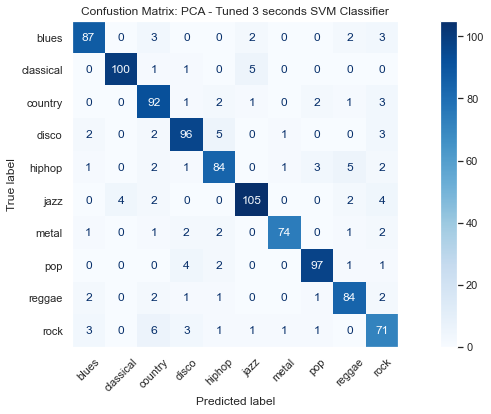

Accuracy : 0.89
Macro F-1 Score : 0.89


In [23]:
# Evaluate Model
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(pcaTestsvm_tuned, y_test, class_labels,
                                    'Confustion Matrix: PCA - Tuned 3 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)